In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as pmimg
from sklearn.cross_validation import train_test_split
from sklearn import svm
%matplotlib inline



In [42]:
images1=pd.read_csv('Desktop/train (1).csv')

In [6]:
images1.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
images=images1.iloc[0:5000,1:]
labels=images1.iloc[0:5000,:1]

In [9]:
labels.head(5)

,label
0,1
1,0
2,1
3,4
4,0


In [48]:
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,random_state=10)

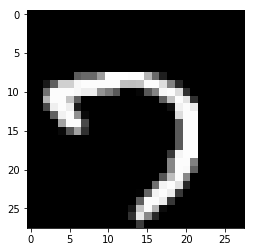

In [49]:
img=train_images.iloc[1].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')

In [50]:
train_images[train_images>0]=1
test_images[test_images>0]=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

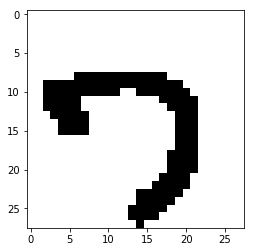

In [51]:
img=train_images.iloc[1].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='binary')

In [52]:
test=pd.read_csv('Desktop/test (1).csv')

In [53]:
test[test>0]=1

In [54]:
clf=svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_labels)

0.91039999999999999

In [55]:
clf.predict(test[0:5000])

array([2, 0, 9, ..., 1, 7, 3], dtype=int64)

In [56]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg=LogisticRegression()
logreg.fit(train_images,train_labels.values.ravel())
predict=logreg.predict(test_images)


In [60]:
from sklearn import metrics
metrics.accuracy_score(test_labels,predict)

0.86480000000000001

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(train_images,train_labels.values.ravel())
pred=knn.predict(test_images)

In [69]:
from sklearn import metrics
metrics.accuracy_score(test_labels,pred)

0.92559999999999998

In [71]:
k_range=range(1,30)
accuracy=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_images,train_labels.values.ravel())
    pred=knn.predict(test_images)
    accuracy.append(metrics.accuracy_score(test_labels,pred))

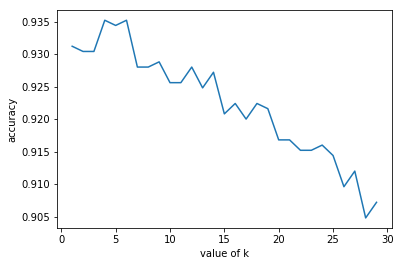

In [73]:
plt.plot(k_range,accuracy)
plt.xlabel('value of k')
plt.ylabel('accuracy')

In [88]:
image=images1.iloc[0:5000,1:]
label=images1.iloc[0:5000,0]
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=10)
scores=cross_val_score(knn,image,label,cv=10,scoring='accuracy')
scores.mean()

0.92482046894834247

In [ ]:
k_range=range(1,30)
accuracy_1=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores_1=cross_val_score(knn,image,label,cv=10,scoring='accuracy')
    accuracy_1.append(scores_1.mean())

    

In [ ]:
accuracy_1

In [ ]:
plt.plot(k_range,accuracy_1)
plt.xlabel('k_range')
plt.ylabel('accuracy_1')